In [104]:
# Import the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing 

In [106]:
df = pd.read_csv('8 Dogecoin.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1979 non-null   object 
 1   Open       1979 non-null   float64
 2   High       1979 non-null   float64
 3   Low        1979 non-null   float64
 4   Close      1979 non-null   float64
 5   Adj Close  1979 non-null   float64
 6   Volume     1979 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 108.4+ KB


In [107]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
1,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
3,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270
4,2017-11-14,0.001201,0.001239,0.001131,0.001184,0.001184,2660340


#### For any trading data, these columns represent:

#### 1. Adjusted Close --> The closing price of the asset adjusted for factors like splits, dividends, and other events that affect the stock's price. This value reflects the true value of the asset over time for analysis and comparison.

#### 2. Close --> The last traded price of the asset for the given period (e.g., day, hour). It represents the final price when the market is closed.

#### 3. High --> The highest price the asset reached during the given period.

#### 4. Open --> The first traded price of the asset when the market opened for the period.

#### 5. Volume --> The total amount of the asset during the period. For Bitcoin, this is typically measured in BTC or a fraction of it.

#### Let's see if we have any missing values in our dataset:

In [110]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values == 0:
        result = f"{BLUE}{missing_values} missing values{RESET}"
    else:
        result = f"{RED}{missing_values} missing values{RESET}"

    print(f"Column '{col}' has {result}")

Column 'Date' has 0 missing values
Column 'Open' has 0 missing values
Column 'High' has 0 missing values
Column 'Low' has 0 missing values
Column 'Close' has 0 missing values
Column 'Adj Close' has 0 missing values
Column 'Volume' has 0 missing values


#### Let's take care of these missing values:

In [112]:
df.dropna(inplace = True)

#### Now we can check the datatype

In [114]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    num_unique_values = df[col].nunique()
    if pd.api.types.is_numeric_dtype(df[col]):
        dtype = f"{BLUE}numerical{RESET}"  # Make "numerical" blue
    else:
        dtype = f"{RED}categorical{RESET}"  # Make "categorical" red

    print(f"Column '{col}' has {num_unique_values} unique {dtype} items")

Column 'Date' has 1979 unique categorical items
Column 'Open' has 1750 unique numerical items
Column 'High' has 1754 unique numerical items
Column 'Low' has 1744 unique numerical items
Column 'Close' has 1759 unique numerical items
Column 'Adj Close' has 1759 unique numerical items
Column 'Volume' has 1979 unique numerical items


#### As we can see, the 'Date' column present categorical values, and they should be in the correct date format, so we are going to convert them:

In [116]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1979 entries, 0 to 1978
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
1979 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.6 KB


#### Now that the Date column is in the correct format, we are going to generate some new columns:

In [118]:
df['Year'] = df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,2017
1,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,2017
2,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,2017
3,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,2017
4,2017-11-14,0.001201,0.001239,0.001131,0.001184,0.001184,2660340,2017


#### Next, we will estimate the trading value in dollars for each period by averaging the high and low prices (which gives us a rough estimate of the trading price) and multiplying this average price by the trading volume to estimate the total value of trades during the period.

In [120]:
df['Dollars'] = ((df['High'] + df['Low'])/2) * df['Volume']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Dollars
0,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,2017,5427.052560
1,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,2017,2675.064920
2,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,2017,3637.589760
3,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,2017,2767.856685
4,2017-11-14,0.001201,0.001239,0.001131,0.001184,0.001184,2660340,2017,3152.502900


#### Now we can perform a simple statistical analysis of the dataset:


In [122]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1979,2020-07-26 00:00:00,2017-11-10 00:00:00,2019-03-19 12:00:00,2020-07-26 00:00:00,2021-12-02 12:00:00,2023-04-11 00:00:00,NaN
Open,1979.0,0.061788,0.001046,0.002613,0.004548,0.08273,0.687801,0.095879
High,1979.0,0.065266,0.00121,0.002672,0.004788,0.085686,0.737567,0.103269
Low,1979.0,0.058452,0.001002,0.002561,0.004278,0.080561,0.608168,0.088712
Close,1979.0,0.061841,0.001038,0.002615,0.004551,0.082984,0.684777,0.09593
Adj Close,1979.0,0.061841,0.001038,0.002615,0.004551,0.082984,0.684777,0.09593
Volume,1979.0,992478516.704396,1431720.0,31328707.0,144188844.0,684832166.5,69410680685.0,3387879258.853337
Year,1979.0,2020.07428,2017.0,2019.0,2020.0,2021.0,2023.0,1.592462
Dollars,1979.0,246494824.310942,1976.48946,99990.345854,384038.962224,63752790.490617,25920833463.102264,1417334926.482188


## Exploratory data analysis

#### We can start analysing the data by plotting an evolution of the closing price of Dogecoin in boxplot and scatter formats

Text(0.5, 1.0, 'Yearly Distribution of Dogecoin Prices')

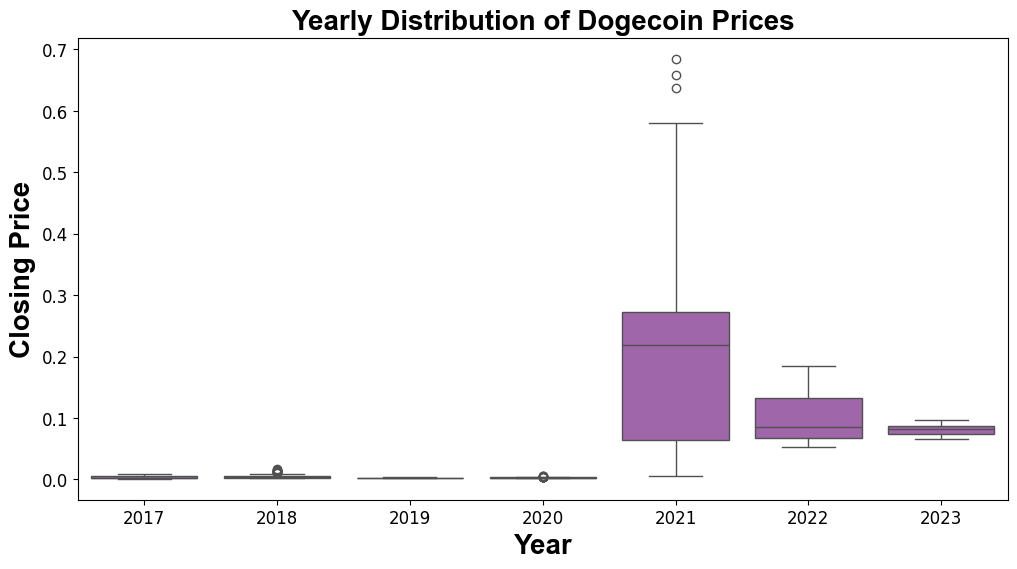

In [124]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Year', y = 'Close', data = df, color = '#a75bb4')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Year', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Closing Price', fontsize = 20, fontweight='bold', **csfont)
plt.title('Yearly Distribution of Dogecoin Prices', fontsize = 20, fontweight='bold', **csfont)

#### Each box represents the distribution of Dogecoin closing prices for a given year. The middle line in each box is the median closing price, and the box edges represent the interquartile range (IQR), showing the spread of the middle 50% of prices. The whiskers in the boxplots extend the minimum and maximum prices within 1.5 times the IQR, and the dots outside the whiskers represent extreme price fluctuations (outliers).

#### With the box plot we can focus on the distribution and summary statistics of prices within each year (median, range, and outliers). 

#### We can see that the price of Dogecoin shows a significant and abrupt upward trend over the years, with more variability (wider boxes and more outliers) in later years. The most noticeable spike in price volatility occurred in 2021, reflecting Dogecoin's boom period. In the earlier years (2017 - 2020), the prices were relatively stable and much lower. In the year 2022, the price dropped again.

Text(0.5, 1.0, 'Yearly Distribution of Dogecoin Prices')

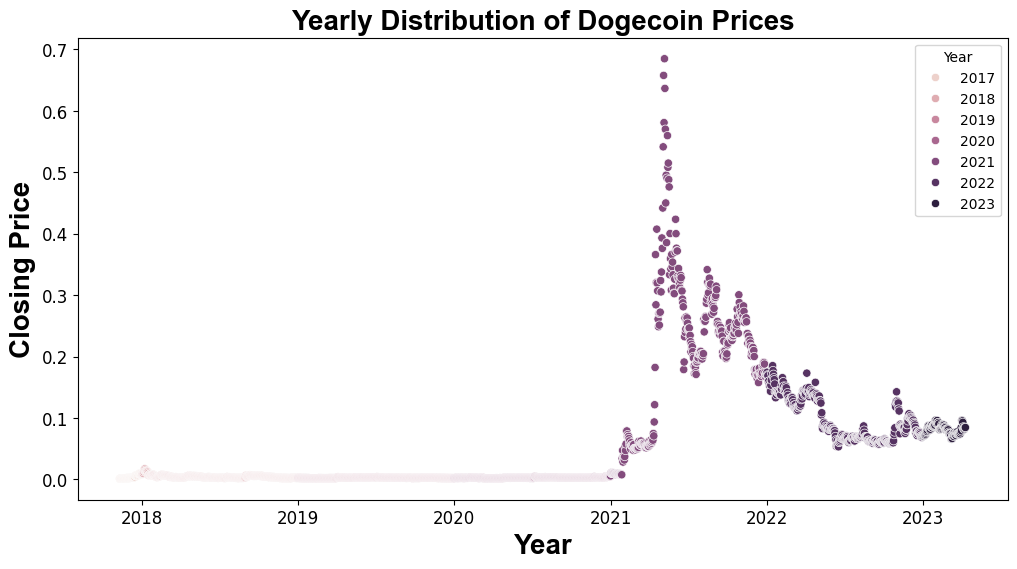

In [126]:
from seaborn import scatterplot

plt.figure(figsize=(12, 6))
scatterplot(data = df, x = 'Date', y = 'Close', hue = 'Year', color = '#a75bb4')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Year', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Closing Price', fontsize = 20, fontweight='bold', **csfont)
plt.title('Yearly Distribution of Dogecoin Prices', fontsize = 20, fontweight='bold', **csfont)

#### With the scatter plot we can see a more detailed daily view of Dogecoin's price movement over time, showing specific trends and fluctuations.

#### In the scatter plot, we can see that each point represents the Dogecoin's closing price for a specific day. The scatter plot clearly shows the trend of increasing Dogecoin prices over time, with most evident spikes in 2021 (as we saw in the boxplot) with noticeable increase in the price volatility as time progresses. After 2021, we can see how the prices of Dogecoin dropped significantly.

#### We can also represent the daily price range of Dogecoin:

Text(0.5, 1.0, 'Dogecoin Daily Price Range')

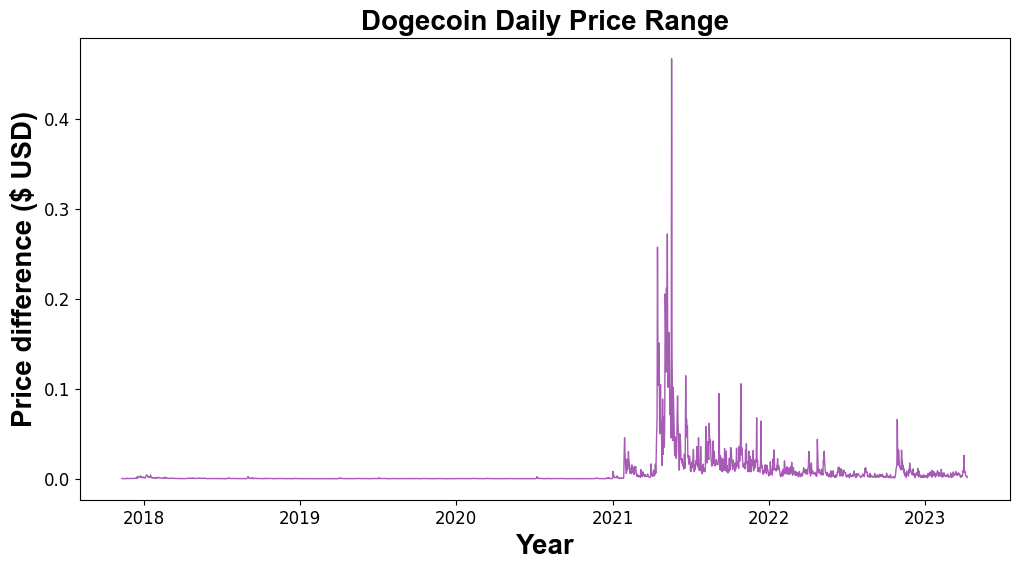

In [128]:
plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['High'] - df['Low'], color = '#a75bb4', linewidth = 1)
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Year', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Price difference ($ USD)', fontsize = 20, fontweight='bold', **csfont)
plt.title('Dogecoin Daily Price Range', fontsize = 20, fontweight='bold', **csfont)

#### From this graph, we can see that before 2021, the price range remains relatively small and stable. This is expected because Dogecoin prices were much lower during this period, with limited market activity and volatility. In the 2021 range, we have Dogecoin's main spike, represented with a sharp increase in daily price. From 2021 onward, the graph shows how the price of Dogecoin significantly dropped.

#### Let's make a similar plot analysing the volume column over the years:

Text(0.5, 1.0, 'Dogecoin Volume over the years')

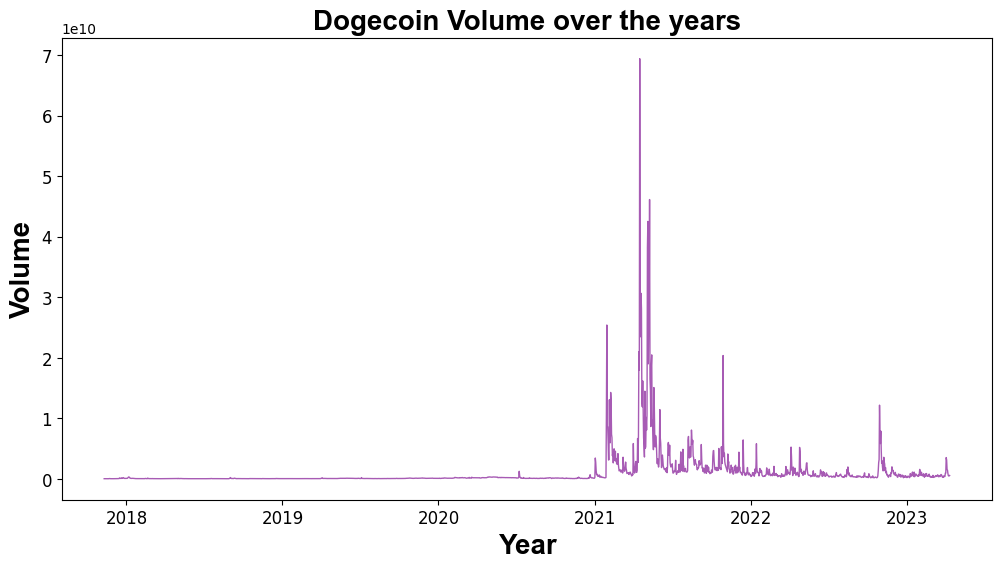

In [130]:
plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['Volume'], color = '#a75bb4', linewidth = 1)
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Year', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Volume', fontsize = 20, fontweight='bold', **csfont)
plt.title('Dogecoin Volume over the years', fontsize = 20, fontweight='bold', **csfont)

#### We can see that the volume (total number of assets) of Dogecoin has generally increased over the years, with significant spikes at certain points.

#### We can finally explore the correlation between the different components of the dataset with a correlation map:

Text(0.5, 1.0, 'Correlation map')

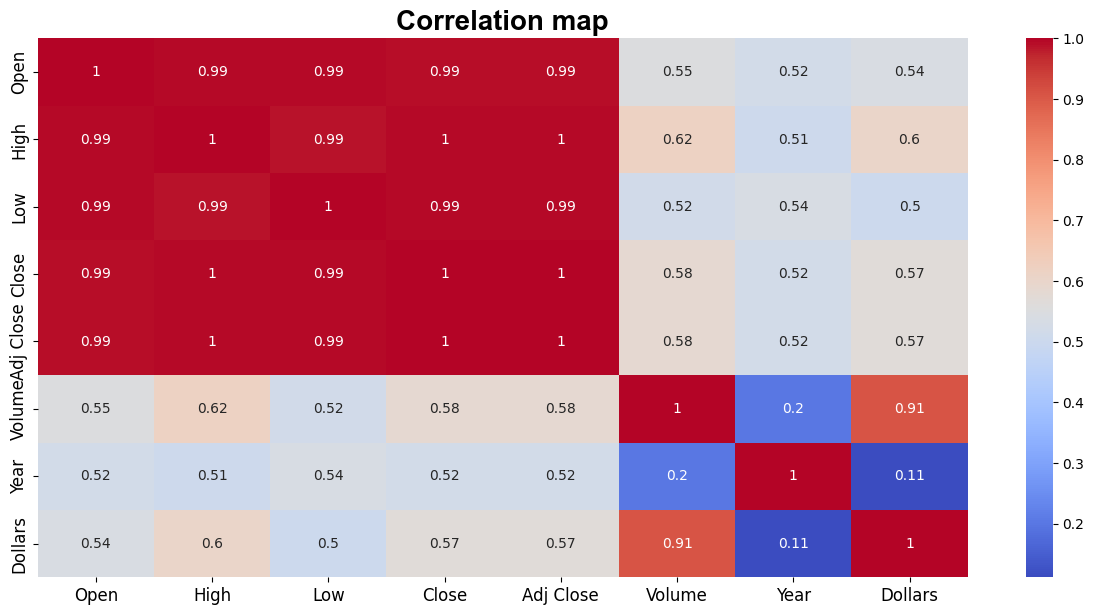

In [132]:
corr = df.corr(numeric_only = True)

plt.figure(figsize=(15,7))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Correlation map', fontsize = 20, fontweight='bold', **csfont)

#### There is a strong correlation between the Adj Close, Close, High, Low and Open columns, which is expected as they all represent different aspects of the Dogecoin price. There is also a strong correlation between the Volume and Dollars columns, suggesting that increased trading activity often leads to higher prices. There is a moderate correlation between trading volume and the price variables, suggesting that higher trading volumes lead to higher prices.

## Train/test split

In [135]:
data = df.filter(['Close'])                               # Create a new dataframe with only the 'Close' column 
dataset = data.values                                     # Convert the dataframe to a numpy array
training_data_len = int(np.ceil( len(dataset) * 0.95 ))    # Get the number of rows to train the model on

#### We are going to use the LSTM model for the prediction of the dogecoin close value. This model often benefits from scaling. This step helps stabilise the training by putting all features on a similar scale, which can speed up convergence and prevent exploding gradients.

In [137]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(dataset)

In [138]:
train_data = scaled_data[0:int(training_data_len), :]

X_train = []
y_train = []

for i in range (60, len(train_data)):             # Starts the loop at index 60 because we need 60 previous data points to form the first sequence and ends at the last data point
    X_train.append(train_data[i-60:i, 0])         # X takes the first 60 points
    y_train.append(train_data[i, 0])              # y takes the next point (61)
    if i <= 61:
        print('X_train = ', X_train)
        print('y_train = ', y_train)
        print()

X_train =  [array([0.00018282, 0.0002384 , 0.        , 0.00025302, 0.00021353,
       0.00044023, 0.00051482, 0.0004022 , 0.00048995, 0.00049434,
       0.00052067, 0.00051335, 0.0011481 , 0.00124755, 0.00127242,
       0.00151227, 0.001445  , 0.00138942, 0.00193787, 0.00152397,
       0.00152251, 0.00162343, 0.00162489, 0.00173312, 0.00208413,
       0.00210753, 0.00237664, 0.00246   , 0.00254629, 0.00230936,
       0.00220698, 0.00257408, 0.00331413, 0.00354375, 0.00390646,
       0.00398398, 0.00715916, 0.00723375, 0.00789044, 0.00676866,
       0.0082239 , 0.00934128, 0.00733613, 0.0090985 , 0.01103345,
       0.01154388, 0.0122459 , 0.01145759, 0.01089305, 0.01221665,
       0.00997749, 0.01160384, 0.0115117 , 0.01185686, 0.01211281,
       0.01258667, 0.01627668, 0.0202197 , 0.02347387, 0.02048589])]
y_train =  [0.018109249289568093]

X_train =  [array([0.00018282, 0.0002384 , 0.        , 0.00025302, 0.00021353,
       0.00044023, 0.00051482, 0.0004022 , 0.00048995, 0.00049434,
 

In [139]:
# Now we transform our data into numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# And we reshape it to the correct shape required by the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1821, 60, 1)

## LSTM Model training

In [141]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [142]:
# Initialize the LSTM model
lstm = tf.keras.models.Sequential()

# Add LSTM layers
lstm.add(tf.keras.layers.LSTM(units = 128, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm.add(tf.keras.layers.LSTM(units = 64, activation = 'relu', return_sequences = False))

# Add Dense layers
lstm.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
lstm.add(tf.keras.layers.Dense(units = 1))  # Output layer (no activation, assuming regression)

# Compile the model
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Display the model summary
lstm.summary()

C:\Users\gabri\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
lstm.fit(X_train, y_train, batch_size = 1, epochs = 2)

Epoch 1/2
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - loss: 0.0086
Epoch 2/2
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - loss: 0.0014


#### We need to create the test dataset to evaluate the performance of the model

In [145]:
test_data = scaled_data[training_data_len - 60:, :]

X_test = []
y_test = test_data[training_data_len:, :]

for i in range(60, len(test_data)):

    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

In [146]:
y_pred = lstm.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step


In [147]:
y_pred = sc.inverse_transform(y_pred)  # Apply the inverse scaler to recover the original data

In [148]:
train_data = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = y_pred

C:\Users\gabri\AppData\Local\Temp\ipykernel_8592\1144065399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_pred


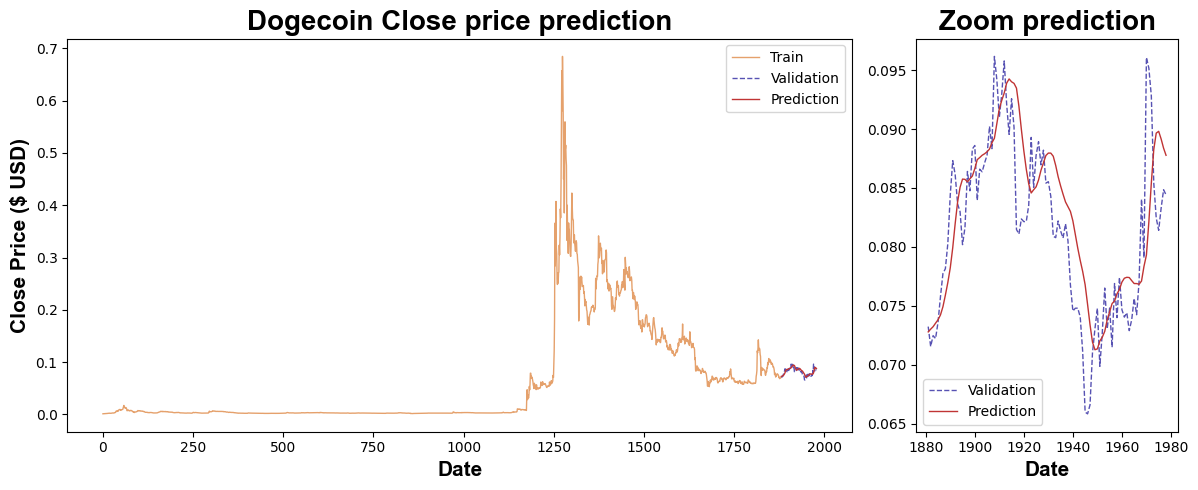

In [180]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 5))
csfont = {'fontname':'Arial'}

gs = gridspec.GridSpec(1, 2, width_ratios=[0.9, 0.3])  # Control width of each subplot (70% and 30%)

ax1 = fig.add_subplot(gs[0])  # First subplot
ax2 = fig.add_subplot(gs[1])  # Second subplot

ax1.plot(train_data['Close'], color = '#e5a16c', linewidth = 1, label = 'Train')
ax1.plot(valid['Close'], '--', color = '#5752b3', linewidth = 1, label = 'Validation')
ax1.plot(valid['Predictions'], color = '#c03434', linewidth = 1, label = 'Prediction')
ax1.set_title("Dogecoin Close price prediction", fontsize = 20, fontweight='bold', **csfont)
ax1.set_xlabel("Date", fontsize=15, fontweight='bold', **csfont)
ax1.set_ylabel("Close Price ($ USD)", fontsize=15, fontweight='bold', **csfont)
ax1.legend()

ax2.plot(valid['Close'], '--', color = '#5752b3', linewidth = 1, label = 'Validation')
ax2.plot(valid['Predictions'], color = '#c03434', linewidth = 1, label = 'Prediction')
ax2.set_title("Zoom prediction", fontsize = 20, fontweight='bold', **csfont)
ax2.set_xlabel("Date", fontsize=15, fontweight='bold', **csfont)
ax2.legend()

plt.tight_layout()